<a href="https://colab.research.google.com/github/dibyanshushekhardey/Hello-ML/blob/main/2.%20Classification/Supervised%20I/Support%20Vector%20Machines/SVM_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Classification**

In [13]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# iris.data
X = iris.data
y = iris.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [8]:
y_pred = clf.predict(X_test)
print(y_pred)

[2 1 2 2 1 2 1 2 1 2 2 1 2 1 1 2 0 2 0 0 1 0 2 2 0 2 1 0 2 1]


In [9]:
#Check precision
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred))
print("----------------")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.96        13

    accuracy                           0.97        30
   macro avg       0.98      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

----------------
0.9666666666666667


In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 13]])

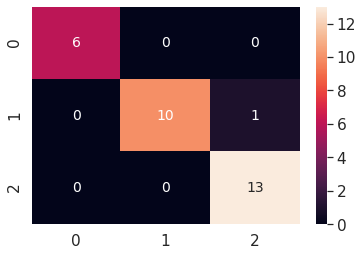

In [16]:
df_cm = pd.DataFrame(cm, range(3), range(3)) # Range fitted based on the previous array
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 14}) # font size , size range based on theprevious plot matrix

plt.show()

In [20]:
## Without pipeline and Standard Scalar
from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
clf1 = SVC(gamma='auto')
clf1.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
y_pred1 = clf1.predict(X_test)
print(y_pred1)

[2 2 2 2 1 2 1 2 1 2 2 1 2 1 1 2 0 2 0 0 1 0 2 2 0 2 1 0 2 1]


In [22]:
#Check precision
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_pred1))
print("----------------")
print(accuracy_score(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.82      0.90        11
           2       0.87      1.00      0.93        13

    accuracy                           0.93        30
   macro avg       0.96      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

----------------
0.9333333333333333


In [23]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)
cm1

array([[ 6,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 13]])

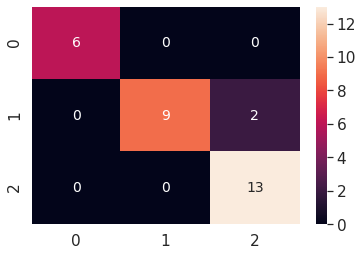

In [24]:
df_cm1 = pd.DataFrame(cm1, range(3), range(3)) # Range fitted based on the previous array
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm1, annot=True, annot_kws={"size": 14}) # font size , size range based on theprevious plot matrix

plt.show()

**Conclusion**
: Here two different methods are used. First one includes use of SVC with make_pipeline and StandardScaler, the second one doesn't use these. 